In [21]:
# -*- coding: utf-8 -*-

# importar a biblioteca usada para trabalhar com vetores e matrizes
import numpy as np

# importar a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import pandas as pd 

# importar as bibliotecas usadas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


Primeiro: vamos importar os dados para o dataframe.

In [23]:
# importar o arquivo e guardar em um dataframe do Pandas
df_dataset = pd.read_csv ( 'apple_quality.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


Segundo: vamos dar uma olhada rápida na base de dados.

In [27]:
# exibir uma amostra do dataframe
#display(df_dataset.head())
display(df_dataset)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados, bem como torná-los mais adequados para sua utilização por um determinado algoritmo de aprendizagem de máquina.

3.1 Eliminação de atributos irrelevantes
O objetivo do projeto é identificar a espécie de uma flor, que é a (classe). Não é preciso uma análise profunda para observar que os atributos id_planta e cidade_origem não contribuem para a identificação. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes.

Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.

In [42]:

display(df_dataset.head(n=40))

,A_id,Size,Weight
0,0.0,-3.970049,-2.512336
1,1.0,-1.195217,-2.839257
2,2.0,-0.292024,-1.351282
3,3.0,-0.657196,-2.271627
4,4.0,1.364217,-1.296612
5,5.0,-3.425400,-1.409082
6,6.0,1.331606,1.635956
7,7.0,-1.995462,-0.428958
8,8.0,-3.867632,-3.734514
9,9.0,-0.727983,-0.442820


 checar se há registros inconsistentes.

In [50]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Size','Weight'],keep=False)] 

# se existir objetos inconsistentes, exibir
if len(df_duplicates)>0:
    print('\nObjeto(s) inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')
    

Não existem objetos redundantes e/ou inconsistentes!


In [52]:
display(df_dataset.tail())

,A_id,Size,Weight
3996,3996.0,-0.293118,1.949253
3997,3997.0,-2.634515,-2.138247
3998,3998.0,-4.008004,-1.779337
3999,3999.0,0.278540,-1.715505
4000,NaN,NaN,NaN


4. Análise dos Dados
A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas para compreender o processo que gerou os dados

In [55]:
# apresenta as principais estatísticas da base de dados para atributos numéricos
df_detalhes = df_dataset.describe()

display(df_detalhes)

,A_id,Size,Weight
count,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547
std,1154.844867,1.928059,1.602507
min,0.000000,-7.151703,-7.149848
25%,999.750000,-1.816765,-2.011770
50%,1999.500000,-0.513703,-0.984736
75%,2999.250000,0.805526,0.030976
max,3999.000000,6.406367,5.790714


4.1 Detecção de outliers (valor atípico)
Outro passo importante na análise e tratamento dos dados é a detecção de outliers (dados gerados por leituras incorretas, erros de digitação etc).

Gráfico Box Plot

Uma das maneiras mais simples de verificar se os dados contém outliers.

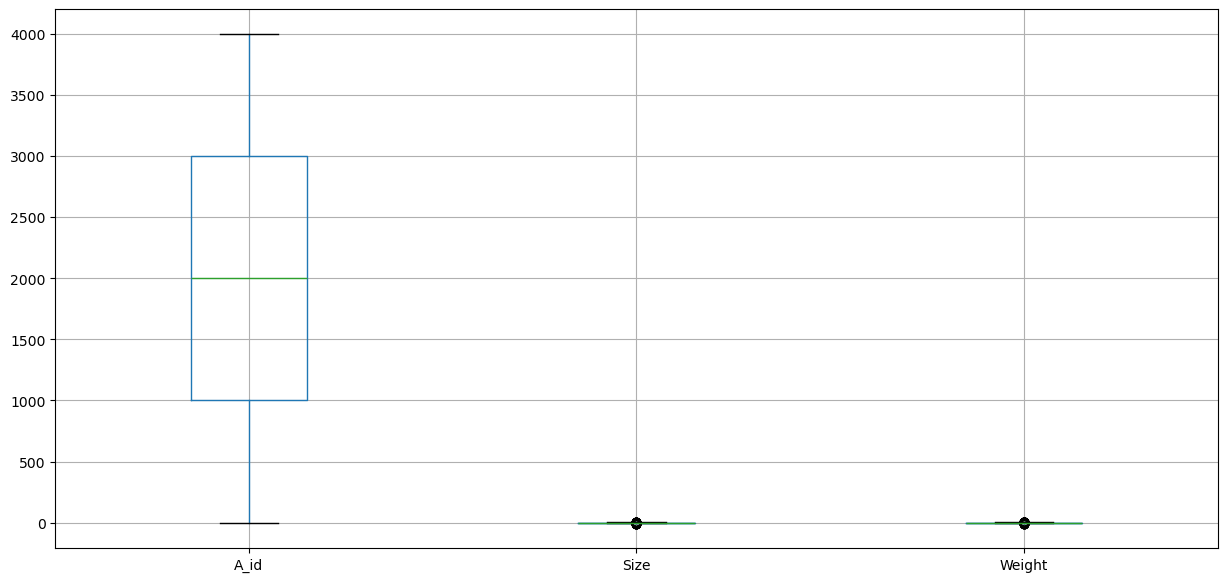

In [58]:
# gerar um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

<p>
    <b>Como o ítem acima <i>A_id</i> está apenas indicando a ordem, não é preciso se preocupar</b>